In [ ]:
!pip install sastrawi -q

     |████████████████████████████████| 209 kB 4.4 MB/s 


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import requests

# Dataset

Dataset opini film diambil dari

```
Antinasari, P., Perdana, R., & Fauzi, M. (2017). Analisis Sentimen Tentang Opini Film Pada Dokumen Twitter Berbahasa Indonesia Menggunakan Naive Bayes Dengan Perbaikan Kata Tidak Baku. Jurnal Pengembangan Teknologi Informasi Dan Ilmu Komputer, 1(12), 1733-1741. Diambil dari https://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/629
```



In [ ]:
# get dataset
!wget https://gist.githubusercontent.com/QialR/dda9d0498590289696985253ba1424db/raw/c1b77192a7c4f7d5072d89bf92de8cf25e4b08c5/data-opini-film.csv

--2022-10-17 09:14:01--  https://gist.githubusercontent.com/QialR/dda9d0498590289696985253ba1424db/raw/c1b77192a7c4f7d5072d89bf92de8cf25e4b08c5/data-opini-film.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22484 (22K) [text/plain]
Saving to: ‘data-opini-film.csv’

data-opini-film.csv 100%[===================>]  21.96K  --.-KB/s    in 0.002s  

2022-10-17 09:14:01 (11.8 MB/s) - ‘data-opini-film.csv’ saved [22484/22484]



In [ ]:
# load dataset into pandas
data = pd.read_csv('data-opini-film.csv')
data.head()

,Id,Sentiment,Text Tweet
0,1,negative,Jelek filmnya... apalagi si ernest gak mutu bg...
1,2,negative,Film king Arthur ini film paling jelek dari se...
2,3,negative,@beexkuanlin Sepanjang film gwa berkata kasar ...
3,4,negative,Ane ga suka fast and furious..menurutku kok je...
4,5,negative,"@baekhyun36 kan gua ga tau film nya, lu bilang..."


# Exploratory Data Analysis (EDA)

In [ ]:
# check missing value
data.isnull().sum()

Id            0
Sentiment     0
Text Tweet    0
dtype: int64

In [ ]:
# check the number of positive and negative tweets
data['Sentiment'].value_counts()

negative    100
positive    100
Name: Sentiment, dtype: int64

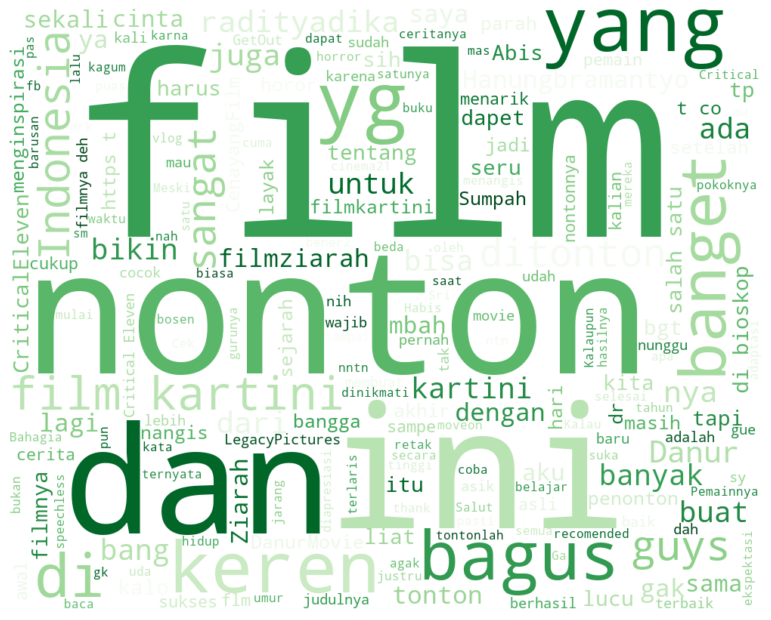

In [ ]:
# wordcloud tweet sentiment positive
data_pos = data[data['Sentiment'] == 'positive']

all_text = ' '.join(word for word in data_pos['Text Tweet'])
wordcloud = WordCloud(colormap='Greens', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

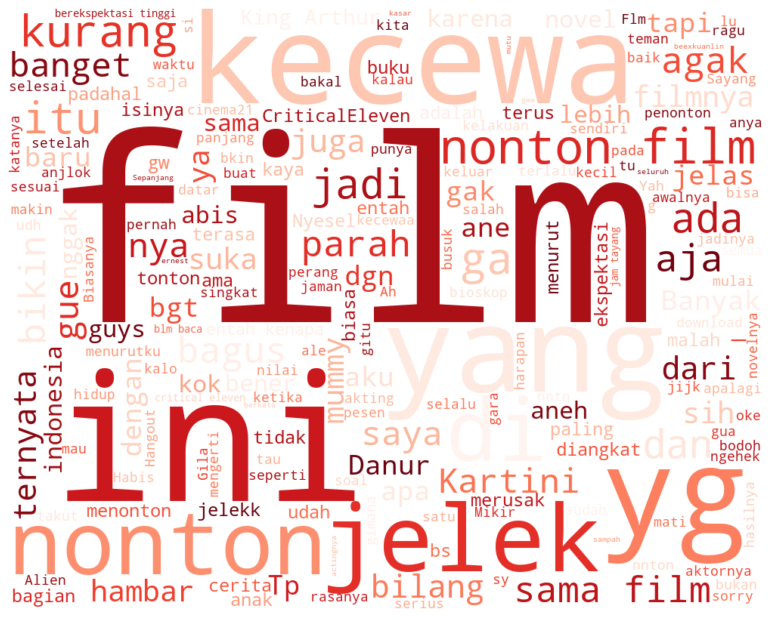

In [ ]:
# wordcloud tweet sentiment negative
data_neg = data[data['Sentiment'] == 'negative']

all_text = ' '.join(word for word in data_neg['Text Tweet'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=800, mode='RGBA', background_color='white').generate(all_text)

plt.figure(figsize=(20,10), dpi=80)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

- Pada wordcloud dokumen bersentimen positive muncul kata-kata sentimen positive seperti `bagus`, `keren`, `menarik`, dan `bangga`.
- Pada wordcloud dokumen bersentimen negative muncuk kata-kata sentimen negative seperti `kecewa`, `jelek`, `kurang`, dan `parah`.
- Terdapat *stopwords* pada dokumen bersentimen positive dan negative seperti kata-kata `yang`, `ini`, `juga`, dan `aja` yang perlu dihapus pada tahap *preprocessing*.

# Preprocessing

Tahap ini melakukan langkah-langkah berikut:
- Cleaning text
- Lowercase
- Remove stopwords
- Stemming / lemmatization
- Tokenization

In [ ]:
import re

# cleaning text
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text =  url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, " ") 
    
    # remove extra whitespace
    text = text.strip()

    # lowercase
    text = text.lower()
    return text

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

# CONSTRUCT STOPWORDS
rama_stopword = "https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/stopword.txt"
yutomo_stopword = "https://raw.githubusercontent.com/yasirutomo/python-sentianalysis-id/master/data/feature_list/stopwordsID.txt"
fpmipa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/fpmipa-stopwords.txt"
sastrawi_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/sastrawi-stopwords.txt"
aliakbar_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/aliakbars-bilp.txt"
pebahasa_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-list/pebbie-pebahasa.txt"
elang_stopword = "https://raw.githubusercontent.com/onlyphantom/elangdev/master/elang/word2vec/utils/stopwords-id.txt"
nltk_stopword = stopwords.words('indonesian')

# create path url for each stopword
path_stopwords = [rama_stopword, yutomo_stopword, fpmipa_stopword, sastrawi_stopword, 
                  aliakbar_stopword, pebahasa_stopword, elang_stopword]

# combine stopwords
stopwords_l = nltk_stopword
for path in path_stopwords:
    response = requests.get(path)
    stopwords_l += response.text.split('\n')

custom_st = '''
yg yang dgn ane smpai bgt gua gwa si tu ama utk udh btw
ntar lol ttg emg aj aja tll sy sih kalo nya trsa mnrt nih
ma dr ajaa tp akan bs bikin kta pas pdahl bnyak guys abis tnx
bang banget nang mas amat bangettt tjoy hemm haha sllu hrs lanjut
bgtu sbnrnya trjadi bgtu pdhl sm plg skrg 
'''

# create dictionary with unique stopword
st_words = set(stopwords_l)
custom_stopword = set(custom_st.split())

# result stopwords
stop_words = st_words | custom_stopword
print(f'Stopwords: {list(stop_words)[:5]}')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Stopwords: ['bung', 'sebaliknya', 'sekali-kali', 'tu', 'menanyai']


In [ ]:
# remove stopwords
from nltk import word_tokenize, sent_tokenize

def remove_stopword(text, stop_words=stop_words):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [ ]:
# stemming and lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming_and_lemmatization(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(text)

In [ ]:
# tokenization
def tokenize(text):
    return word_tokenize(text)

In [ ]:
# example
text = 'Dari segi akting para pemainnya bagus, terasa natural walau kadang-kadang ada yang agak kurang natural juga. Teknik pengambilan gambar banyak dilakukan zoom in untuk pendetailan yang membuatnya menjadi keren. Selain itu ada juga shoot dari atas menggunakan drone.Kemudian hal yang paling khas adalah adegan di mana pikiran tokoh utama dijadikan sebuah visualisasi, misalnya saat Kartini mengobrol dengan temannya yang orang Belanda maka visualisasi temannya benar-benar ada di sampingnya.Di film ini ada beberapa scene yang menggunakan tulisan penjelasan. Sebetulnya itu ok-ok saja (bukan ok oce wkwkw), tapi di bagian awal ada satu scene yang background-nya hitam polos disertai tulisan, yang mana agak mengganggu karena jadi teringat editan amatir saya waktu zaman sekolahan dulu. https://mediakonsumen.com/2017/04/21/review/review-film-kartini-2017'
print(f'Original text: \n{text}\n')

# cleaning text and lowercase
text = cleaning_text(text)
print(f'Cleaned text: \n{text}\n')

# remove stopwords
text = remove_stopword(text)
print(f'Removed stopword: \n{text}\n')

# stemming and lemmatization
text = stemming_and_lemmatization(text)
print(f'Stemmed and lemmatized: \n{text}\n')

# tokenization
text = tokenize(text)
print(f'Tokenized: \n{text}')

Original text: 
Dari segi akting para pemainnya bagus, terasa natural walau kadang-kadang ada yang agak kurang natural juga. Teknik pengambilan gambar banyak dilakukan zoom in untuk pendetailan yang membuatnya menjadi keren. Selain itu ada juga shoot dari atas menggunakan drone.Kemudian hal yang paling khas adalah adegan di mana pikiran tokoh utama dijadikan sebuah visualisasi, misalnya saat Kartini mengobrol dengan temannya yang orang Belanda maka visualisasi temannya benar-benar ada di sampingnya.Di film ini ada beberapa scene yang menggunakan tulisan penjelasan. Sebetulnya itu ok-ok saja (bukan ok oce wkwkw), tapi di bagian awal ada satu scene yang background-nya hitam polos disertai tulisan, yang mana agak mengganggu karena jadi teringat editan amatir saya waktu zaman sekolahan dulu. https://mediakonsumen.com/2017/04/21/review/review-film-kartini-2017

Cleaned text: 
dari segi akting para pemainnya bagus  terasa natural walau kadang kadang ada yang agak kurang natural juga  teknik 

In [ ]:
# pipeline preprocess
def preprocess(text):
    # cleaning text and lowercase
    output = cleaning_text(text)

    # remove stopwords
    output = remove_stopword(output)

    # stemming and lemmatization
    output = stemming_and_lemmatization(output)

    # tokenization
    output = tokenize(output)

    return output

In [ ]:
# test pipeline preprocess
text = 'Dari segi akting para pemainnya bagus, terasa natural walau kadang-kadang ada yang agak kurang natural juga. Teknik pengambilan gambar banyak dilakukan zoom in untuk pendetailan yang membuatnya menjadi keren. Selain itu ada juga shoot dari atas menggunakan drone.Kemudian hal yang paling khas adalah adegan di mana pikiran tokoh utama dijadikan sebuah visualisasi, misalnya saat Kartini mengobrol dengan temannya yang orang Belanda maka visualisasi temannya benar-benar ada di sampingnya.Di film ini ada beberapa scene yang menggunakan tulisan penjelasan. Sebetulnya itu ok-ok saja (bukan ok oce wkwkw), tapi di bagian awal ada satu scene yang background-nya hitam polos disertai tulisan, yang mana agak mengganggu karena jadi teringat editan amatir saya waktu zaman sekolahan dulu. https://mediakonsumen.com/2017/04/21/review/review-film-kartini-2017'
preprocess(text)

['segi',
 'akting',
 'main',
 'bagus',
 'natural',
 'kadang',
 'kadang',
 'natural',
 'teknik',
 'ambil',
 'gambar',
 'zoom',
 'in',
 'detail',
 'buat',
 'keren',
 'shoot',
 'drone',
 'khas',
 'adegan',
 'pikir',
 'tokoh',
 'jadi',
 'visualisasi',
 'kartini',
 'obrol',
 'teman',
 'belanda',
 'visualisasi',
 'teman',
 'samping',
 'film',
 'scene',
 'tulis',
 'jelas',
 'oce',
 'wkwkw',
 'scene',
 'background',
 'hitam',
 'polos',
 'serta',
 'tulis',
 'ganggu',
 'edit',
 'amatir',
 'zaman',
 'sekolah']

In [ ]:
# implement preprocessing
preprocess.text = preprocessed_data
preprocessed_data = data.copy()
preprocessed_data['Text Tweet'] = data['Text Tweet'].map(preprocess)

In [ ]:
preprocessed_data.head(20)

,Id,Sentiment,Text Tweet
0,1,negative,"[jelek, film, ernest, gak, mutu, actingnya, fi..."
1,2,negative,"[film, king, arthur, film, jelek, cerita, king..."
2,3,negative,"[film, kasar, bapak]"
3,4,negative,"[ga, suka, fast, and, furious, turut, jelek, f..."
4,5,negative,"[ga, tau, film, bilang, perang, perang, perang..."
5,6,negative,"[editingnya, bagus, kecewa, film, indonesia, t..."
6,7,negative,"[kecewa, aktor, dukung, nista, agama, sabar, t..."
7,8,negative,"[kecewa, parah, film, dear, sorry, say, this]"
8,9,negative,"[kecewa, nonton, film]"
9,10,negative,"[themummy, 2017, film, memgecewakan, berekspek..."


In [ ]:
preprocessed_data['Text Tweet'][14]

['film',
 'kartini',
 'trlalu',
 'singkat',
 'tonton',
 'blm',
 'baca',
 'biografi',
 'kartini',
 'bingung',
 'sndiri',
 'blm',
 'baca',
 'bukuny']

Data sudah dilakukan preprocessing untuk keseluruhan.

Tahap berikutnya melakukan split dataset menjadi data train dan data test.

# Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = preprocessed_data['Text Tweet']
y = preprocessed_data['Sentiment']

X.head(15)

0     [jelek, film, ernest, gak, mutu, actingnya, fi...
1     [film, king, arthur, film, jelek, cerita, king...
2                                  [film, kasar, bapak]
3     [ga, suka, fast, and, furious, turut, jelek, f...
4     [ga, tau, film, bilang, perang, perang, perang...
5     [editingnya, bagus, kecewa, film, indonesia, t...
6     [kecewa, aktor, dukung, nista, agama, sabar, t...
7         [kecewa, parah, film, dear, sorry, say, this]
8                                [kecewa, nonton, film]
9     [themummy, 2017, film, memgecewakan, berekspek...
10                               [film, jelek, ga, isi]
11    [nonton, film, indonesia, bioskop, kartini, cr...
12    [nonton, film, kartini, miris, jaman, jaman, b...
13    [danur, jelek, gausah, tonton, hans, bayang, m...
14    [film, kartini, trlalu, singkat, tonton, blm, ...
Name: Text Tweet, dtype: object

In [ ]:
# mapping, negative = 0, positive = 1
y = y.map({'negative':0, 'positive':1})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Sentiment, dtype: int64

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=2021)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((180,), (180,), (20,), (20,))

In [ ]:
train_x.head()

24                         [adegan, potong, rusak, film]
70     [film, mummy, gak, harap, film, weird, film, t...
194    [turut, danur, bagus, bangga, film, horor, kar...
107         [menang, film, kartini, banggafilmindonesia]
149    [moral, petik, film, wonder, woman, satu, jaga...
Name: Text Tweet, dtype: object

# Feature Extraction



## Build frequency dictionary

In [ ]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in tweet:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [ ]:
# create vocabulary / dictionary frequencies
freqs = build_freqs(train_x.tolist(), train_y.tolist())

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 804


In [ ]:
# check frequency
print(f"Freq dari 'bagus' untuk sentiment 'positive': {freqs[('bagus', 1)]}")
print(f"Freq dari 'jelek' untuk sentiment 'negative': {freqs[('jelek', 0)]}")

Freq dari 'bagus' untuk sentiment 'positive': 18
Freq dari 'jelek' untuk sentiment 'negative': 17


## Extract Features

In [ ]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    # loop through each word in the list of words
    for word in tweet:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.),0)
        
    assert(x.shape == (1, 3))
    return x

In [ ]:
# test extract features function
tmp = extract_features(train_x.to_numpy()[0], freqs)

print(f'text: {train_x.to_numpy()[0]}')
print(f'feature extraction result: {tmp}')

text: ['adegan', 'potong', 'rusak', 'film']
feature extraction result: [[  1. 107. 110.]]


In [ ]:
# test 2
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('wkwkwk ', freqs)
print(tmp2)

[[1. 0. 0.]]


In [ ]:
# extract all of the features

# collect the features 'x' and stack them into a matrix 'X'
X_train = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X_train[i, :]= extract_features(train_x.to_numpy()[i], freqs)

X_train[:5]

array([[  1., 107., 110.],
       [  1., 330., 332.],
       [  1., 143., 123.],
       [  1., 132., 114.],
       [  1., 118., 107.]])

# Logistic Regression

In [ ]:
# create sigmoid function
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))
    
    return h

In [ ]:
# test sigmoid function
sigmoid(-1.4721)

0.18662363413574892

In [ ]:
# create gradient descent function

def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))    

        # update the weights theta
        theta = theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))
    
    J = float(J)
    return J, theta

In [ ]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


## Training

In [ ]:
# training labels corresponding to X
Y_train = np.expand_dims(train_y.to_numpy(), axis=1)

# Apply gradient descent
init_theta = np.zeros((3, 1))
init_alpha = 1e-4
iter = 5000

J, theta = gradientDescent(X_train, Y_train, init_theta, init_alpha, iter)

print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24686694.
The resulting vector of weights is [-0.00522124, 0.1615717, -0.16818916]


## Testing

In [ ]:
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''

    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    print(x)
    
    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))
    
    return y_pred

In [ ]:
for tweet in test_x:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

[[  1. 110. 107.]]
['film', 'komedi', 'lucu', 'bangt', 'bahasa', 'jawa'] -> 0.443104
[[  1. 140. 139.]]
['film', 'nonton', 'derita'] -> 0.317892
[[  1. 127. 106.]]
['film', 'keren', 'falsafah', 'salut'] -> 0.936215
[[  1. 217. 219.]]
['bahas', 'film', 'angkat', 'novel', 'film', 'puas'] -> 0.144601
[[ 1. 24. 16.]]
['ga', 'sabar', 'nunggu', 'bluray', 'special', 'feature', 'keren', 'lucu', 'bloopernya'] -> 0.765213
[[  1. 110. 154.]]
['jelek', 'jelek', 'film', 'dimension', 'rilis', 'akting', 'ga'] -> 0.000293
[[  1. 114. 113.]]
['film', 'danur', 'kes', 'sosok', 'asih', 'expresi', 'datar', 'penasaran'] -> 0.356308
[[  1. 132. 114.]]
['kerja', 'film', 'kartini', 'sungguh2', 'main', 'produksi', 'selamat'] -> 0.895545
[[  1. 146. 147.]]
['coba', 'nonton', 'film', 'asik', 'parah'] -> 0.242401
[[  1. 161. 147.]]
['netizen', 'batal', 'nonton', 'film', 'kartini', 'gara', 'gara', 'laku'] -> 0.783132
[[  1. 110. 115.]]
['aduh', 'film', 'jijk', 'parah'] -> 0.171634
[[  1. 131. 116.]]
['thanks', 'for

In [ ]:
# predict single tweet
tweet1 = 'bagus bagus'
tweet2 = 'jelek jelek'
tweet3 = 'bagus jelek'

print( '%s -> %f' % (tweet1, predict_tweet(preprocess(tweet1), freqs, theta)))
print( '%s -> %f' % (tweet2, predict_tweet(preprocess(tweet2), freqs, theta)))
print( '%s -> %f' % (tweet3, predict_tweet(preprocess(tweet3), freqs, theta)))

[[ 1. 36. 18.]]
bagus bagus -> 0.941803
[[ 1.  0. 34.]]
jelek jelek -> 0.003257
[[ 1. 18. 26.]]
bagus jelek -> 0.186966


## Accuracy test

In [ ]:
y_hat = []

for tweet in test_x:
    # get the label prediction for the tweet
    y_pred = predict_tweet(tweet, freqs, theta)
    
    if y_pred > 0.5:
        # append 1.0 to the list
        y_hat.append(1)
    else:
        # append 0 to the list
        y_hat.append(0)

[[  1. 110. 107.]]
[[  1. 140. 139.]]
[[  1. 127. 106.]]
[[  1. 217. 219.]]
[[ 1. 24. 16.]]
[[  1. 110. 154.]]
[[  1. 114. 113.]]
[[  1. 132. 114.]]
[[  1. 146. 147.]]
[[  1. 161. 147.]]
[[  1. 110. 115.]]
[[  1. 131. 116.]]
[[  1. 221. 233.]]
[[  1. 178. 157.]]
[[  1. 115. 111.]]
[[  1. 163. 147.]]
[[  1. 116. 114.]]
[[  1. 107. 109.]]
[[  1. 137. 121.]]
[[  1. 117. 136.]]


In [ ]:
# calculate accuracy
accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)

print(f"Logistic regression model's accuracy = {accuracy:.4f}")

Logistic regression model's accuracy = 0.7000
